

#Etapas do Projeto





## 1. Importação de Bibliotecas e Dados



In [33]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline


In [34]:
# Carregar dados diretamente do GitHub (formato RAW)
df = pd.read_csv('https://raw.githubusercontent.com/HEPALMA17/FIAP_THE_CHALLENGE_4/main/Obesity.csv')

df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 2. Análise Exploratória dos Dados

In [35]:
# Verificar tipos de dados e valores nulos
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## 3. Visualização Inicial da Variável Alvo

C:\Users\Samsung\AppData\Local\Temp\ipykernel_1532\2948306663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Obesity', palette='Set2')


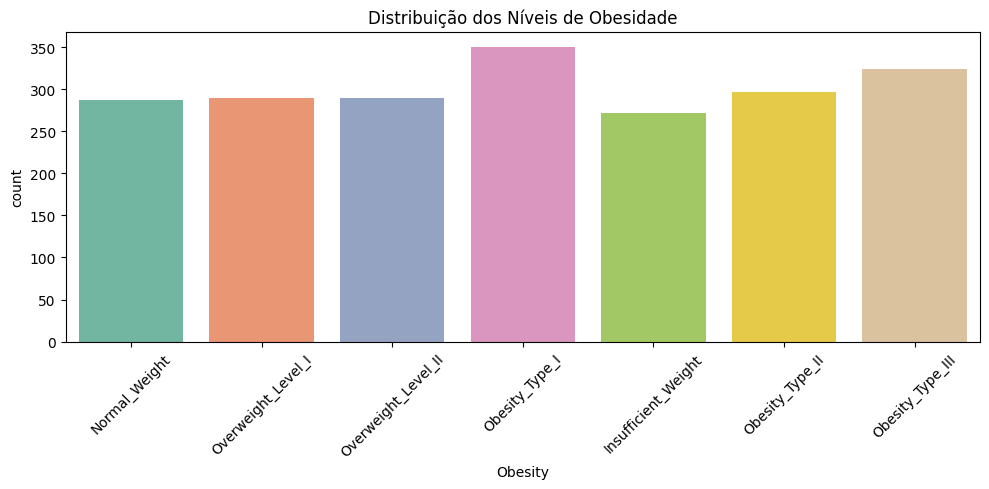

In [36]:
# Visualizar distribuição da variável alvo 'Obesity'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Obesity', palette='Set2')
plt.title('Distribuição dos Níveis de Obesidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Pré-processamento de Dados

Objetivo:
Transformar os dados brutos em um formato que possa ser interpretado por algoritmos de Machine Learning, tratando variáveis categóricas, valores numéricos e preparando o conjunto de treino e teste.

In [37]:
# 2_preprocessamento.py

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Carregar dados diretamente do GitHub (formato RAW)
df = pd.read_csv('https://raw.githubusercontent.com/HEPALMA17/FIAP_THE_CHALLENGE_4/main/Obesity.csv')


# Visualizar colunas categóricas
cat_cols = df.select_dtypes(include='object').columns
print("Colunas categóricas:", list(cat_cols))

# Verificar colunas
print("Colunas originais:", df.columns.tolist())

# Corrigir nome da coluna se estiver errado
if 'TUE' in df.columns:
    df.rename(columns={'TUE': 'TER'}, inplace=True)
    print("Coluna TUE renomeada para TER")

# Verificar novamente
print("Colunas após ajuste:", df.columns.tolist())

# Codificar variáveis categóricas
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])



Colunas categóricas: ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']
Colunas originais: ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity']
Coluna TUE renomeada para TER
Colunas após ajuste: ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TER', 'CALC', 'MTRANS', 'Obesity']


## 5. Codificação de Variáveis Categóricas
Vamos aplicar LabelEncoder para converter os valores categóricos em números.

In [38]:
# Aplicar Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardar para possível uso posterior (ex: inversão)

# Visualizar resultado
print(df.head())

   Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0     2      0   
1       0  21.0    1.52    56.0               1     0   3.0  3.0     2      1   
2       1  23.0    1.80    77.0               1     0   2.0  3.0     2      0   
3       1  27.0    1.80    87.0               0     0   3.0  3.0     2      0   
4       1  22.0    1.78    89.8               0     0   2.0  1.0     2      0   

   CH2O  SCC  FAF  TER  CALC  MTRANS  Obesity  
0   2.0    0  0.0  1.0     3       3        1  
1   3.0    1  3.0  0.0     2       3        1  
2   2.0    0  2.0  1.0     1       3        1  
3   2.0    0  2.0  0.0     1       4        5  
4   2.0    0  0.0  0.0     2       3        6  


## 6. Separar Features (X) e Target (y)

In [39]:
# Separar variáveis preditoras e alvo
X = df.drop('Obesity', axis=1)
y = df['Obesity']

## 7. Divisão em Conjuntos de Treino e Teste

In [40]:
# Dividir os dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar dimensões
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Classes:", y.value_counts())

Shape X_train: (1688, 16)
Shape X_test : (423, 16)
Classes: Obesity
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64


### O que terá ao final dessa etapa:
df tratado com todas as variáveis categóricas codificadas

X_train, X_test, y_train, y_test prontos para treinar modelos

In [41]:
print("Exemplo de linha já codificada:")
print(X_train.iloc[0])

Exemplo de linha já codificada:
Gender             1.00
Age               19.00
Height             1.76
Weight            79.00
family_history     1.00
FAVC               1.00
FCVC               2.00
NCP                3.00
CAEC               1.00
SMOKE              0.00
CH2O               3.00
SCC                0.00
FAF                1.00
TER                2.00
CALC               1.00
MTRANS             3.00
Name: 459, dtype: float64


## 8. Treinamento do Modelo com Pipeline

**Objetivo**:
Criar um modelo preditivo com um pipeline de Machine Learning que envolva:

Padronização (StandardScaler)

Algoritmo (RandomForestClassifier)

Avaliação de desempenho

Salvamento do modelo

In [42]:
# Criar pipeline: Padronização + Modelo
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Avaliar o modelo
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", acc)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Salvar modelo treinado
with open("modelo_obesidade.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Modelo salvo com sucesso!")

Acurácia: 0.9527186761229315

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.82      0.97      0.89        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.94      0.88      0.91        58
           6       0.96      0.95      0.96        58

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423

✅ Modelo salvo com sucesso!


### O que terá após essa etapa:
modelo_obesidade.pkl: modelo salvo com pipeline completo

Avaliação impressa no terminal:

Acurácia

Relatório de classificação

## 8. Aplicativo com Streamlit para Previsão

In [43]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Samsung\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
# 4_app_streamlit.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Carregar modelo treinado
with open('modelo_obesidade.pkl', 'rb') as f:
    model = pickle.load(f)

st.title("Sistema Preditivo de Obesidade")
st.write("""
Este app permite prever o nível de obesidade com base nos dados do paciente.
Preencha os campos abaixo e clique em 'Prever'.
""")

def user_input_features():
    gender = st.selectbox('Gênero', ['Female', 'Male'])
    age = st.number_input('Idade', min_value=1, max_value=120, value=30)
    height = st.number_input('Altura (metros)', min_value=0.5, max_value=2.5, value=1.7, format="%.2f")
    weight = st.number_input('Peso (kg)', min_value=10, max_value=300, value=70)
    family_history = st.selectbox('Histórico familiar de excesso de peso?', ['No', 'Yes'])
    favc = st.selectbox('Você come alimentos altamente calóricos com frequência?', ['No', 'Yes'])
    fcvc = st.selectbox('Você costuma comer vegetais nas refeições?', ['No', 'Sometimes', 'Frequently'])
    ncp = st.slider('Quantas refeições principais você faz por dia?', 1, 5, 3)
    caec = st.selectbox('Você come algo entre as refeições?', ['No', 'Sometimes', 'Frequently'])
    smoke = st.selectbox('Você fuma?', ['No', 'Yes'])
    ch2o = st.slider('Quantos litros de água você bebe por dia?', 1, 5, 2)
    scc = st.selectbox('Você monitora a quantidade de calorias que ingere?', ['No', 'Yes'])
    faf = st.selectbox('Com que frequência você pratica atividade física?', ['Never', 'Sometimes', 'Frequently'])
    ter = st.slider('Tempo diário com dispositivos tecnológicos (horas)', 0, 10, 3)
    calc = st.selectbox('Frequência de consumo de álcool', ['Never', 'Sometimes', 'Frequently'])
    mtrans = st.selectbox('Meio de transporte habitual', ['Bike', 'Car', 'Motorbike', 'Public Transport', 'Walking'])

    data = {
        'Gender': gender,
        'Age': age,
        'Height': height,
        'Weight': weight,
        'family_history': family_history,
        'FAVC': favc,
        'FCVC': fcvc,
        'NCP': ncp,
        'CAEC': caec,
        'SMOKE': smoke,
        'CH2O': ch2o,
        'SCC': scc,
        'FAF': faf,
        'TER': ter,
        'CALC': calc,
        'MTRANS': mtrans
    }
    return pd.DataFrame(data, index=[0])

input_df = user_input_features()

# Pré-processamento das entradas: aplicar os mesmos LabelEncoders usados no treino
from sklearn.preprocessing import LabelEncoder

encoders_info = {
    'Gender': ['Female', 'Male'],
    'family_history': ['No', 'Yes'],
    'FAVC': ['No', 'Yes'],
    'FCVC': ['No', 'Sometimes', 'Frequently'],
    'CAEC': ['No', 'Sometimes', 'Frequently'],
    'SMOKE': ['No', 'Yes'],
    'SCC': ['No', 'Yes'],
    'FAF': ['Never', 'Sometimes', 'Frequently'],
    'CALC': ['Never', 'Sometimes', 'Frequently'],
    'MTRANS': ['Bike', 'Car', 'Motorbike', 'Public Transport', 'Walking']
}

for col, categories in encoders_info.items():
    le = LabelEncoder()
    le.classes_ = np.array(categories)
    input_df[col] = le.transform(input_df[col])

# Previsão
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

st.subheader('Previsão do nível de obesidade:')
st.write(prediction[0])

st.subheader('Probabilidades por classe:')
probs_df = pd.DataFrame(prediction_proba, columns=model.classes_)
st.write(probs_df.T)

2025-07-23 01:49:21.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Atualização no seu app Streamlit

In [45]:
# Adicionar ao início do script
import seaborn as sns
import matplotlib.pyplot as plt



Depois do carregamento do modelo, adicione o seletor de página:

In [46]:
# Menu lateral para alternar entre páginas
pagina = st.sidebar.selectbox("Escolha a página", ["Previsão", "Análise dos Dados"])


2025-07-23 01:49:21.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:21.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


##  Parte de Análise dos Dados

In [47]:
# Página: ANÁLISE DOS DADOS
if pagina == "Análise dos Dados":
    st.header("📊 Análise dos Dados de Obesidade")

    # Carregar dados originais
    df = pd.read_csv("Obesity.csv")

    st.subheader("Distribuição da variável alvo (Obesity)")
    fig1, ax1 = plt.subplots()
    sns.countplot(data=df, x="Obesity", palette="Set2", ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    st.pyplot(fig1)

    st.subheader("Matriz de Correlação")
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

    fig2, ax2 = plt.subplots(figsize=(10, 6))
    sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', ax=ax2)
    st.pyplot(fig2)

    st.subheader("Distribuição das variáveis numéricas")
    num_cols = df_encoded.select_dtypes(include=np.number).columns.drop("Obesity")

    for col in num_cols:
        fig, ax = plt.subplots()
        sns.histplot(df_encoded[col], kde=True, bins=20, ax=ax)
        ax.set_title(f'Distribuição de {col}')
        st.pyplot(fig)


## Página de Previsão (não precisa alterar)
A lógica de previsão pode permanecer como está, apenas garanta que ela só execute se pagina == "Previsão":

In [48]:
if pagina == "Previsão":
    st.title("Sistema Preditivo de Obesidade")
    st.write("""Este app permite prever o nível de obesidade com base nos dados do paciente.""")

    input_df = user_input_features()

    # Reaplicar os encoders
    for col, categories in encoders_info.items():
        le = LabelEncoder()
        le.classes_ = np.array(categories)
        input_df[col] = le.transform(input_df[col])

    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    st.subheader('Previsão do nível de obesidade:')
    st.write(prediction[0])

    st.subheader('Probabilidades por classe:')
    st.write(pd.DataFrame(prediction_proba, columns=model.classes_).T)


2025-07-23 01:49:22.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:22.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:22.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:22.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:22.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:22.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:22.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 01:49:22.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

##### Abrir App no terminal: cd "C:\Users\Samsung\Desktop\#TREINAMENTO\POS FIAP\CHALLENGE - F4

#### streamlit run 4_app_streamlit.py

